# Das Chromat-Dichromat Gleichgewicht

In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
from scipy import constants as cnst
import numpy as np
import pandas as pd
import glob
import math
from IPython.display import HTML

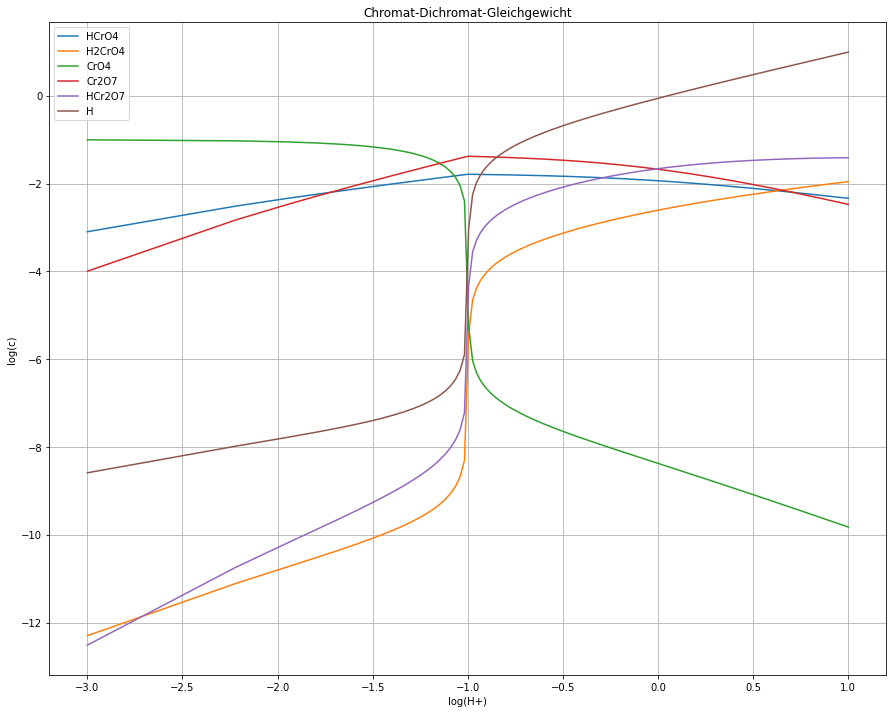

,lg(H+) Start,log(HCrO4),log(H2CrO4),log(CrO4),log(Cr2O7),log(HCr2O7),log(H)
0,0.001,-3.098,-12.298,-1.004,-3.996,-12.514,-8.588
1,0.006,-2.515,-11.111,-1.027,-2.832,-10.744,-7.983
2,0.011,-2.344,-10.746,-1.051,-2.490,-10.208,-7.789
3,0.016,-2.244,-10.519,-1.076,-2.289,-9.881,-7.663
4,0.021,-2.173,-10.350,-1.102,-2.146,-9.641,-7.565
5,0.026,-2.118,-10.212,-1.131,-2.037,-9.448,-7.482
6,0.031,-2.073,-10.093,-1.161,-1.948,-9.284,-7.407
7,0.036,-2.036,-9.985,-1.194,-1.873,-9.139,-7.337
8,0.041,-2.004,-9.886,-1.229,-1.809,-9.007,-7.269
9,0.046,-1.975,-9.791,-1.268,-1.752,-8.884,-7.203


In [5]:
# Konstanten
k_1 = 4.1
k_2 = 3.2e-7
k_3 = 0.85
k_4 = 158

# Anfangskonzentrationen
c_Na2CrO4 = 0.1
c_HNO3 = np.arange(1e-3,1e1,0.005)
c_HCrO4 = 0.1
c_H = 0.1

l_HCrO4 = []
l_H2CrO4 = []
l_CrO4 = []
l_Cr2O7 = []
l_HCr2O7 = []
l_H = []

for h in c_HNO3:
    while True:
        while True:
            c_H2CrO4 = c_H*c_HCrO4/k_1
            c_CrO4 = k_2*c_HCrO4/c_H
            c_Cr2O7 = k_4*c_HCrO4**2
            c_HCr2O7 = c_Cr2O7*c_H/k_3
            # Chrombilanz
            x = c_CrO4+c_HCrO4+c_H2CrO4+2*c_HCr2O7+2*c_Cr2O7
            if(abs(c_Na2CrO4/x-1)<1e-6):
                break
            c_HCrO4 = c_HCrO4*(c_Na2CrO4/x)**0.5
        sk = c_H+2*c_Na2CrO4
        sa = c_HCrO4+2*c_CrO4+c_HCr2O7+2*c_Cr2O7+h
        if(abs(sa/sk-1)<1e-6):
            break
        c_H = c_H*(sa/sk)**1
        
    l_HCrO4.append(math.log10(c_HCrO4))
    l_H2CrO4.append(math.log10(c_H2CrO4))
    l_CrO4.append(math.log10(c_CrO4))
    l_Cr2O7.append(math.log10(c_Cr2O7))
    l_HCr2O7.append(math.log10(c_HCr2O7))
    l_H.append(math.log10(c_H))
    

# Darstellung der Daten
lgc_HNO3 = np.log10(c_HNO3)
fig = plt.figure(figsize=(15, 12)) 
plt.minorticks_on
plt.grid(True,which='both')
plt.xlabel('log(H+)')
plt.ylabel('log(c)')
plt.title('Chromat-Dichromat-Gleichgewicht')
plt.plot(lgc_HNO3,l_HCrO4,lgc_HNO3,l_H2CrO4,lgc_HNO3,l_CrO4,lgc_HNO3,l_Cr2O7,lgc_HNO3,l_HCr2O7,lgc_HNO3,l_H)
plt.legend(['HCrO4','H2CrO4','CrO4','Cr2O7','HCr2O7','H'])
plt.show()
fig.savefig('test.png') 

# Daten in Tabellenform
df_HNO3 = pd.DataFrame(data=c_HNO3, columns=['lg(H+) Start'])
df_HCrO4 = pd.DataFrame(data=l_HCrO4,columns=['log(HCrO4)'])
df_H2CrO4 = pd.DataFrame(data=l_H2CrO4,columns=['log(H2CrO4)'])
df_CrO4 = pd.DataFrame(data=l_CrO4,columns=['log(CrO4)'])
df_Cr2O7 = pd.DataFrame(data=l_Cr2O7,columns=['log(Cr2O7)'])
df_HCr2O7 = pd.DataFrame(data=l_HCr2O7,columns=['log(HCr2O7)'])
df_H = pd.DataFrame(data=l_H,columns=['log(H)'])
df = pd.concat([df_HNO3,df_HCrO4,df_H2CrO4,df_CrO4,df_Cr2O7,df_HCr2O7,df_H],axis=1)
display(HTML(df.round(3).to_html(index=True)))
df.to_csv('Test.csv')